In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
import graphviz 

# ucitavanje podataka
data = pd.read_csv('/content/drive/MyDrive/data_1.csv',header=None)
data = data.values

# podjela na trening, test skup i validacioni skup
x_train, x_validation, y_train, y_validation = train_test_split(data[:,0:13], data[:,13], test_size=0.2)
x_train = np.column_stack((x_train[:,0],x_train[:,1]))
x_validation = np.column_stack((x_validation[:,0],x_validation[:,1]))

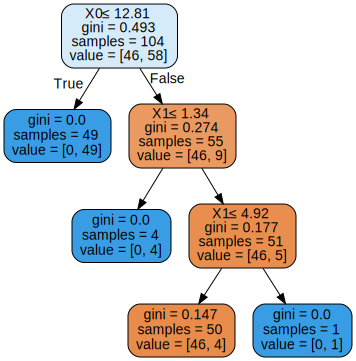

In [5]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(x_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Text(0.5, 1.0, 'Tacnost kasifikacije u zavisnosti od maksimalne dubine stabla')

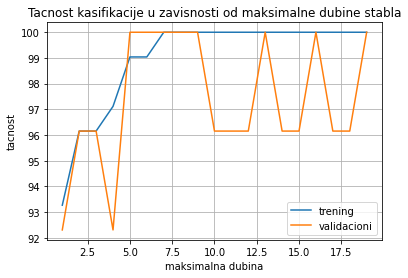

In [ ]:
d = np.arange(1,20,1)
acc_validation = np.zeros(len(d))
acc_train = np.zeros(len(d))

for i in range(0,len(d)):
  clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = d[i])
  clf = clf.fit(x_train, y_train)
  y_predict = clf.predict(x_validation)
  cm = confusion_matrix(y_validation,y_predict)
  acc_validation[i] = cm[0,0] + cm[1,1]
  y_predict = clf.predict(x_train)
  cm = confusion_matrix(y_train,y_predict)
  acc_train[i] = cm[0,0] + cm[1,1]

acc_train = acc_train/len(y_train)*100
acc_validation = acc_validation/len(y_validation)*100

plt.plot(d,acc_train)
plt.plot(d,acc_validation)
plt.grid()
plt.legend(['trening','validacioni'])
plt.xlabel('maksimalna dubina')
plt.ylabel('tacnost')
plt.title('Tacnost kasifikacije u zavisnosti od maksimalne dubine stabla')

In [ ]:
def plot_results(x,y,x_val,y_val,clf,title='Decision Tree'):
  plt.scatter(x[y == 1][:,0],x[y == 1][:,1],marker ='h',linewidth=2)
  plt.scatter(x[y == 0][:,0],x[y == 0][:,1],marker ='h',linewidth=2)
  plt.scatter(x_val[y_val == 1][:,0],x_val[y_val == 1][:,1],marker ='*',linewidth=2)
  plt.scatter(x_val[y_val == 0][:,0],x_val[y_val == 0][:,1],marker ='*',linewidth=2)
  xmin, xmax, ymin, ymax = plt.axis()
  x1, x2 = np.meshgrid(np.linspace(xmin, xmax, num=100, endpoint=True), 
  np.linspace(ymin, ymax, num=100, endpoint=True))
  x_shape = x1.shape
  x1 = x1.ravel()
  x2 = x2.ravel()
  z = clf.predict(np.column_stack((x1,x2)))
  z = z.reshape(x_shape)
  x1 = x1.reshape(x_shape)
  x2 = x2.reshape(x_shape)
  cs = plt.contourf(x1, x2, z, alpha=0.2, cmap='bwr')
  plt.title(title)
  plt.grid()
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.legend(['$y_{train} = 1$','$y_{train} = 0$','$y_{validation} = 1$','$y_{validation} = 0$'])

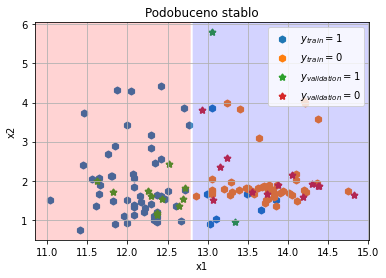

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
clf = clf.fit(x_train, y_train)
plot_results(x_train,y_train,x_validation,y_validation,clf,'Podobuceno stablo')


In [2]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
clf = clf.fit(x_train, y_train)
plot_results(x_train,y_train,x_validation,y_validation,clf,'Optimalna dubina stabla')


NameError: ignored

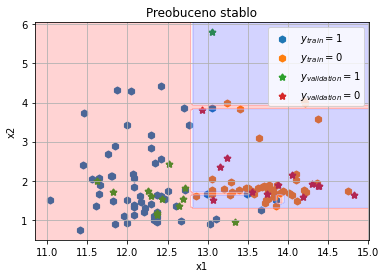

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
clf = clf.fit(x_train, y_train)
plot_results(x_train,y_train,x_validation,y_validation,clf,'Preobuceno stablo')